In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

In [5]:
dfs=[pd.read_csv(df_path) for df_path in df_paths]

In [6]:
#process data 2
#making mean value of every df columns and attaching it to country

def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df



In [7]:
#process data 2
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

/tmp/ipykernel_3076769/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_3076769/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_3076769/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_3076769/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version

In [15]:
###reset data frame to sorted by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)

Text(0, 0.5, 'Domestic Consumption')

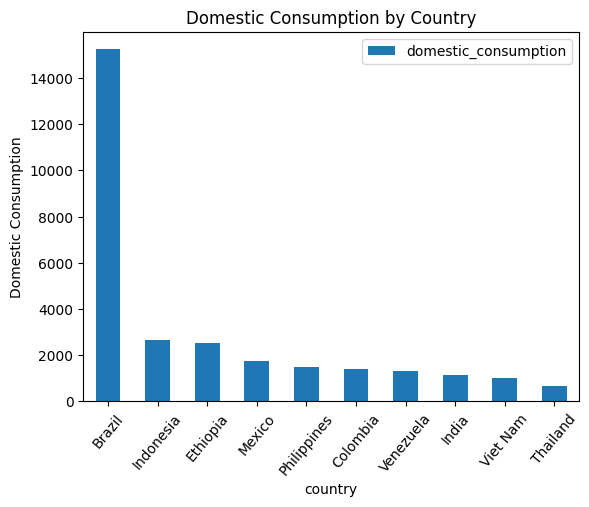

In [17]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

Text(0, 0.5, 'Coffee Exports')

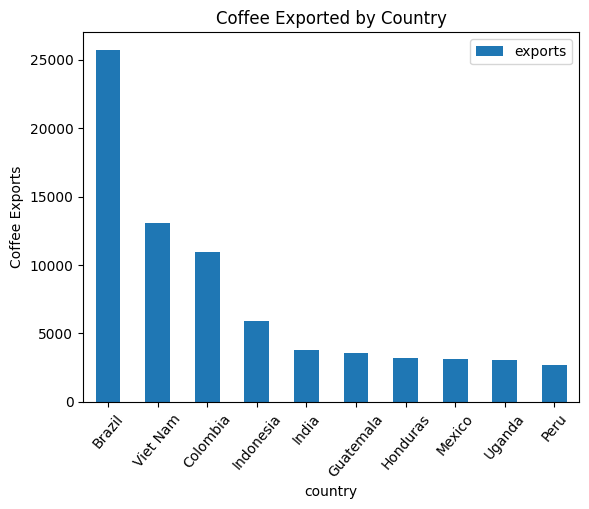

In [21]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [25]:
#Find total null values for each field
data.isna().sum()

country                 0
domestic_consumption    0
exports                 0
exports_crop_year       0
gross_opening_stocks    0
total_production        0
dtype: int64

In [26]:
#returns True or False for duplicated rows
data.duplicated()

#locate duplicated data
data.loc[data.duplicated()]

#locate duplicated data of one field
data.loc[data.duplicated(subset=['country'])]

,country,domestic_consumption,exports,exports_crop_year,gross_opening_stocks,total_production


In [ ]:
#Drop the outlier in the data (Brazil, index 2)
data.drop(2, inplace=True)

In [30]:
data.corr()

/tmp/ipykernel_3076769/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,domestic_consumption,exports,exports_crop_year,gross_opening_stocks,total_production
domestic_consumption,1.000000,0.531461,0.525576,0.699045,0.641531
exports,0.531461,1.000000,0.999601,0.779306,0.988202
exports_crop_year,0.525576,0.999601,1.000000,0.774267,0.988120
gross_opening_stocks,0.699045,0.779306,0.774267,1.000000,0.809914
total_production,0.641531,0.988202,0.988120,0.809914,1.000000


<Axes: title={'center': 'Country Domestic Consumption x Exports'}, xlabel='domestic_consumption', ylabel='exports'>

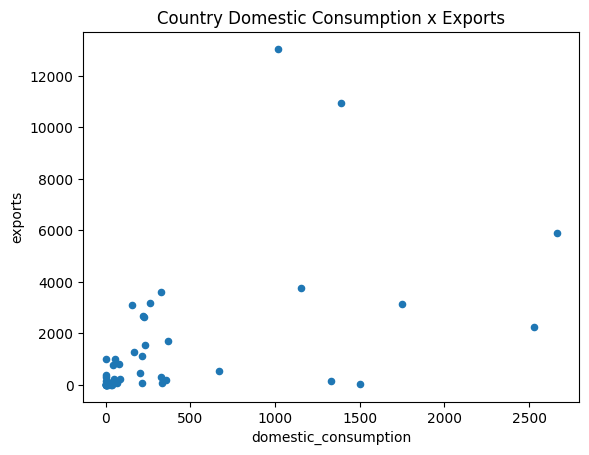

In [36]:
data.plot(kind='scatter', x='domestic_consumption', y='exports', title='Country Domestic Consumption x Exports')

<Axes: xlabel='domestic_consumption', ylabel='exports'>

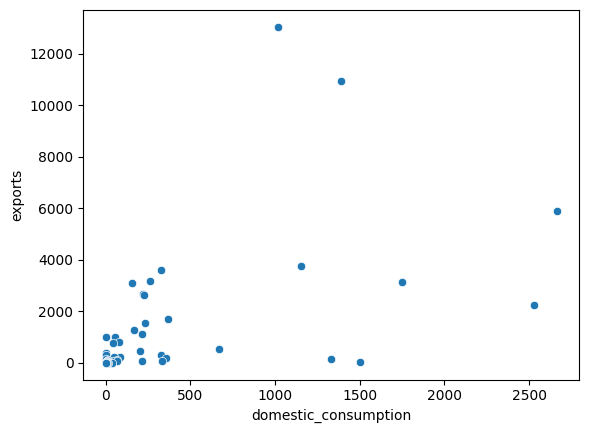

In [41]:
sns.scatterplot(x='domestic_consumption', y='exports', data=data)

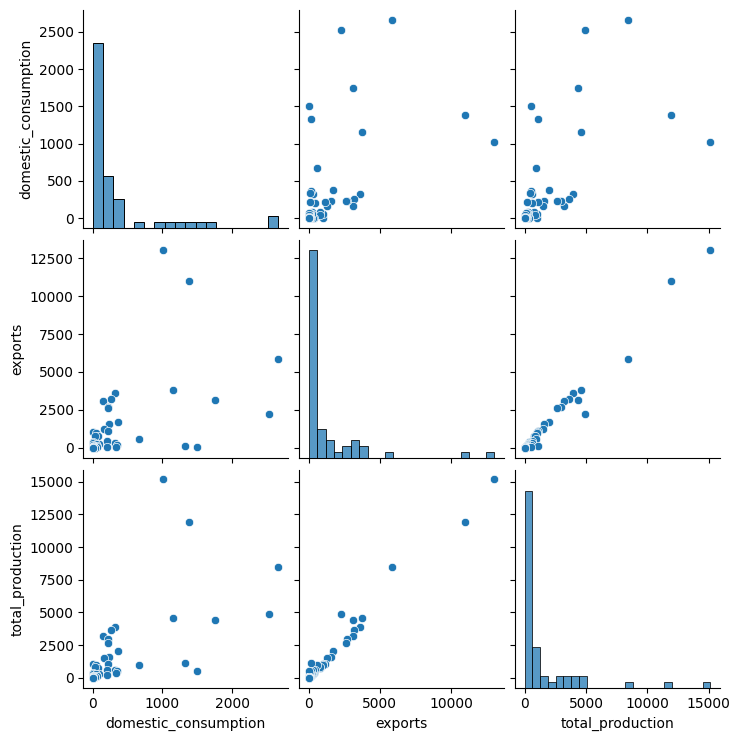

In [43]:
sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])
plt.show()